In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle as pkl
import pickle5 as pkl5
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import mdtraj as md

import sys
blocking_dir='/storage1/thomasen/software/BLOCKING/MonoCV'
sys.path.append(blocking_dir)
import block as block

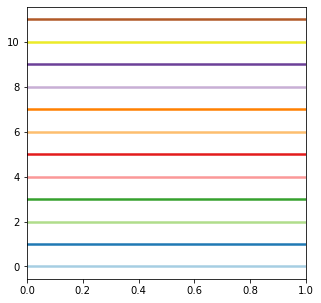

In [2]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

new_cmap = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#ECEC28','#B15928']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors_IDPs = rtg_r(np.linspace(0,1,12))

#Test colormap
fig = plt.figure(figsize=(5,5))

for i in range(len(colors_IDPs)):
    plt.axhline(i, color=colors_IDPs[i], linewidth=2.5)

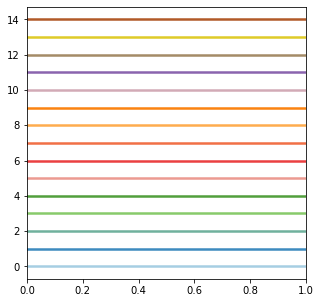

In [3]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

new_cmap = ['#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#ECEC28','#B15928']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors_multidomain = rtg_r(np.linspace(0,1,15))

#Test colormap
fig = plt.figure(figsize=(5,5))

for i in range(len(colors_multidomain)):
    plt.axhline(i, color=colors_multidomain[i], linewidth=2.5)

In [4]:
lambda_PP = '0.88'
lambda_PW = '1.10'
lambda_PWBB = '1.22'
errmethod = 'hline'

In [5]:
IDPs = ['K25', 'A1', 'CoRNID', 'ColNT', 'FhuA', 'Hst52', 'K19', 'PNt', 'Sic1', 'aSyn', 'Hst5', 'ACTR']
exp_Rg_IDPs = {'PNt': [4.96, 0.56], 
               'Sic1': [2.86, 0.14], 
               'Hst5':[1.34, 0.05], 
               'ACTR':[2.55, 0.27], 
               'K25': [4.06, 0.28], 
               'A1': [2.55, 0.1], 
               'CoRNID': [4.72, 0.12], 
               'ColNT':[2.82, 0.034], 
               'FhuA':[3.21, 0.22], 
               'Hst52':[1.77, 0.049], 
               'K19':[3.35, 0.29], 
               'aSyn':[3.56, 0.036]
              }

IDPs_plotnames = {'K25':'Tau$_{K25}$', 
                  'A1':'hnRNPA1$_{LCD}$', 
                  'CoRNID':'CoR$_{NID}$', 
                  'ColNT':'ColN$_{T}$', 
                  'FhuA':'FhuA', 
                  'Hst52':'Hst5$_2$', 
                  'K19':'Tau$_{K19}$', 
                  'PNt':'PRN$_{Nt}$', 
                  'Sic1':'Sic1', 
                  'aSyn':'αSyn', 
                  'Hst5':'Hst5', 
                  'ACTR':'ACTR$_{AD}$'
}

multidomain_alt = ['TIA1', 'hnRNPA1', 'hSUMO_hnRNPA1', 'THB_C2', 'Gal-3', 'mTurq_GS0_mNeon', 'mTurq_GS8_mNeon', 'mTurq_GS16_mNeon', 'mTurq_GS24_mNeon', 'mTurq_GS32_mNeon', 'mTurq_GS48_mNeon', 'Ubq2', 'Ubq3', 'Ubq4', 'C5_C6_C7']
multidomain = ['TIA1', 'FL-A1', 'hSUMO-FL-A1', 'THB-C2', 'Gal3', 'GS0', 'GS8', 'GS16', 'GS24', 'GS32', 'GS48', 'Ubq2', 'Ubq3', 'Ubq4', 'C5-C6-C7']

exp_Rg_multidomain = {'GS0':[3.2, 0.044], 
                      'GS8':[3.37, 0.036],
                      'GS16':[3.45, 0.06],
                      'GS24':[3.57, 0.075],
                      'GS32':[3.75, 0.097],
                      'GS48':[4.11, 0.21],
                      'Ubq2':[2.19, 0.18],
                      'Ubq3':[2.62, 0.018],
                      'Ubq4':[3.19, 0.092],
                      'C5-C6-C7':[3.75, 0.075],
                      'TIA1':[2.75, 0.05],
                      'FL-A1':[3.12, 0.078],
                      'hSUMO-FL-A1':[3.37, 0.13],
                      'THB-C2':[1.91, 0.076],
                      'Gal3':[2.91, 0.06]
                     }

multidomain_alt_plotnames = {'TIA1':'TIA1', 
                         'hnRNPA1':'hnRNPA1', 
                         'hSUMO_hnRNPA1':'hisSUMO-hnRNPA1', 
                         'THB_C2':'MyBP-C$_{MTHB-C2}$', 
                         'Gal-3':'Gal-3', 
                         'mTurq_GS0_mNeon':'mTurq-mNeon', 
                         'mTurq_GS8_mNeon':'mTurq-GS$_8$-mNeon', 
                         'mTurq_GS16_mNeon':'mTurq-GS$_{16}$-mNeon', 
                         'mTurq_GS24_mNeon':'mTurq-GS$_{24}$-mNeon', 
                         'mTurq_GS32_mNeon':'mTurq-GS$_{32}$-mNeon', 
                         'mTurq_GS48_mNeon':'mTurq-GS$_{48}$-mNeon', 
                         'Ubq2':'Ubq$_2$', 
                         'Ubq3':'Ubq$_3$', 
                         'Ubq4':'Ubq$_4$', 
                         'C5_C6_C7':'MyBP-C$_{C5-C6-C7}$'
}

multidomain_plotnames = {'TIA1':'TIA1', 
                         'FL-A1':'hnRNPA1', 
                         'hSUMO-FL-A1':'hisSUMO-hnRNPA1', 
                         'THB-C2':'MyBP-C$_{MTHB-C2}$', 
                         'Gal3':'Gal-3', 
                         'GS0':'mTurq-mNeon', 
                         'GS8':'mTurq-GS$_8$-mNeon', 
                         'GS16':'mTurq-GS$_{16}$-mNeon', 
                         'GS24':'mTurq-GS$_{24}$-mNeon', 
                         'GS32':'mTurq-GS$_{32}$-mNeon', 
                         'GS48':'mTurq-GS$_{48}$-mNeon', 
                         'Ubq2':'Ubq$_2$', 
                         'Ubq3':'Ubq$_3$', 
                         'Ubq4':'Ubq$_4$', 
                         'C5-C6-C7':'MyBP-C$_{C5-C6-C7}$'
}

In [6]:
def load_pickle(filename):
    with open(filename, 'rb') as f:
        loaded_obj = pkl.load(f)
        
    return loaded_obj

def load_pickle5(filename):
    with open(filename, 'rb') as f:
        loaded_obj = pkl5.load(f)
        
    return loaded_obj

# Rg IDPs

## Unmodified Martini3

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


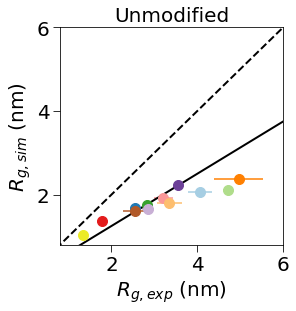

In [7]:
l = '1.00'

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in IDPs:
    Rg = np.genfromtxt(f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_IDPs[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_IDPs[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein,Rg_sim_vs_protein)


#Plot
fig= plt.figure(figsize=(4,4))

plt.title('Unmodified', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = 6.0
axis_min = 0.8
#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10)

fig.savefig('figures/Rg_IDPs_unmodified.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig('figures/Rg_IDPs_unmodified.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


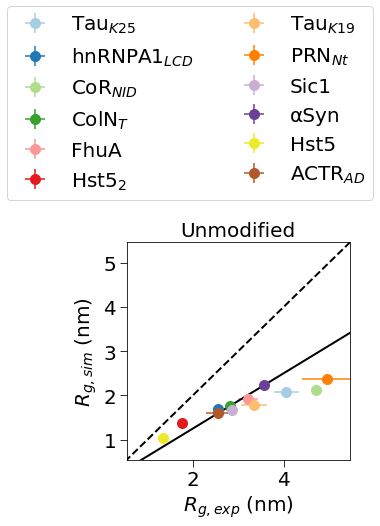

In [8]:
#Plot
fig= plt.figure(figsize=(4,4))

plt.title('Unmodified', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10, label=IDPs_plotnames[protein])

#plt.legend(fontsize=20, ncol=int(len(IDPs)/2), bbox_to_anchor=(1.15, 1.15))
plt.legend(fontsize=20, ncol=2, bbox_to_anchor=(1.15, 1.15))


fig.savefig('figures/IDPs_legend.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig('figures/IDPs_legend.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


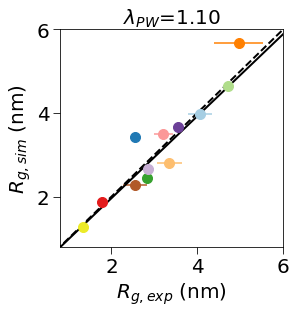

In [9]:
Rg_dir = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PW'

l = lambda_PW

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in IDPs:

    Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_IDPs[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_IDPs[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein,Rg_sim_vs_protein)


#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PW}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 6.0
axis_min = 0.8
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10)

fig.savefig(f'figures/Rg_IDPs_PW_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_IDPs_PW_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-protein

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


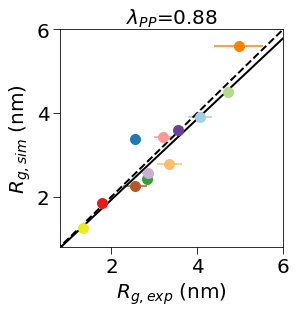

In [10]:
Rg_dir = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP'

l = lambda_PP

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in IDPs:

    Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_IDPs[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_IDPs[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein,Rg_sim_vs_protein)


#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PP}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 6.0
axis_min = 0.8
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10)

fig.savefig(f'figures/Rg_IDPs_PP_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_IDPs_PP_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water backbone

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


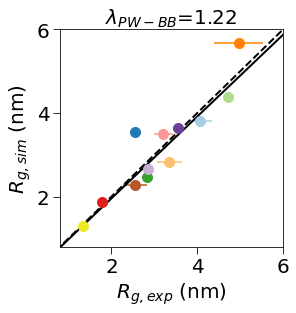

In [11]:
Rg_dir = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PW_BB'

l = lambda_PWBB

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in IDPs:

    if l == '1.00':
        Rg = np.genfromtxt(f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    else:
        Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_IDPs[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_IDPs[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein,Rg_sim_vs_protein)


#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PW-BB}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 6.0
axis_min = 0.8
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(IDPs):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_IDPs[i], markersize=10)

fig.savefig(f'figures/Rg_IDPs_PWBB_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_IDPs_PWBB_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

# Rg multidomain

## Unmodified Martini 3

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


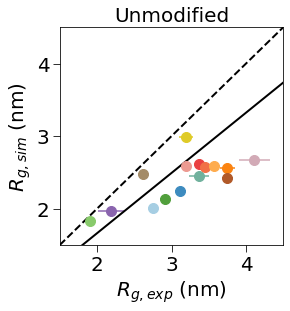

In [12]:
l = '1.00'

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in multidomain:

    Rg = np.genfromtxt(f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
  
    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_multidomain[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_multidomain[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein,Rg_sim_vs_protein)


#Plot
fig= plt.figure(figsize=(4,4))

plt.title('Unmodified', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = 4.5
axis_min = 1.5
#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10)
    
fig.savefig('figures/Rg_multidomain_unmodified.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig('figures/Rg_multidomain_unmodified.pdf', bbox_inches='tight', pad_inches=1, dpi=400)


/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


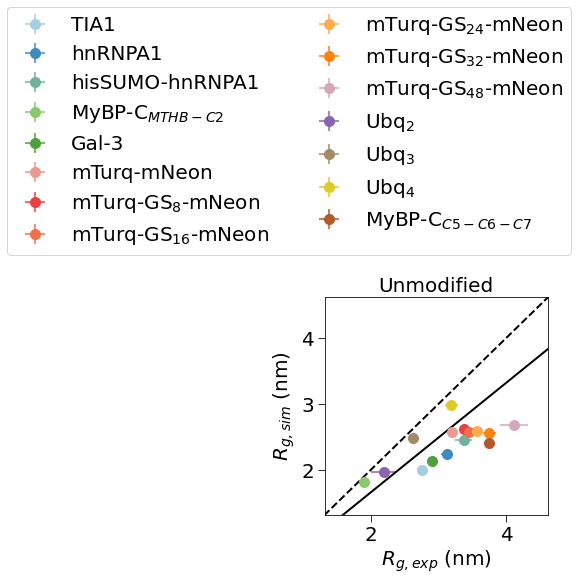

In [13]:
#Plot
fig= plt.figure(figsize=(4,4))

plt.title('Unmodified', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10, label=multidomain_plotnames[protein])

#plt.legend(fontsize=20, ncol=int(len(multidomain)/3), bbox_to_anchor=(1.15, 1.15))
plt.legend(fontsize=20, ncol=2, bbox_to_anchor=(1.15, 1.15))
    
fig.savefig('figures/multidomain_legend.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig('figures/multidomain_legend.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


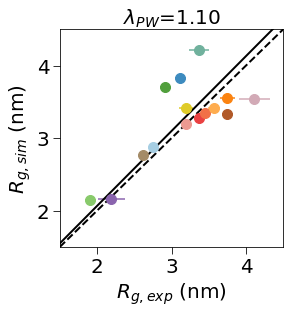

In [14]:
Rg_dir = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW'

l = lambda_PW

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in multidomain:

    Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_multidomain[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_multidomain[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein,Rg_sim_vs_protein)


#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PW}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

axis_max = 4.5
axis_min = 1.5
#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10)

fig.savefig(f'figures/Rg_multidomain_PW_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_multidomain_PW_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-protein

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


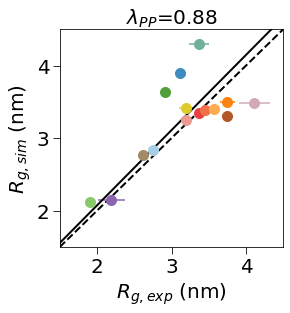

In [15]:
Rg_dir = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP'

l = lambda_PP

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in multidomain:

    Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_multidomain[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_multidomain[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein,Rg_sim_vs_protein)


#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PP}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 4.5
axis_min = 1.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10)

fig.savefig(f'figures/Rg_multidomain_PP_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_multidomain_PP_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water backbone

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


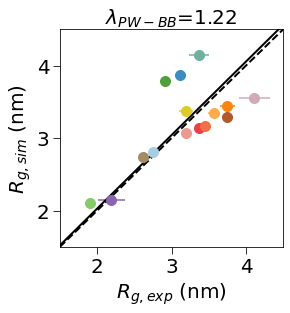

In [16]:
Rg_dir = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW_BB'

l = lambda_PWBB

Rg_sim_vs_protein = []
Rg_exp_vs_protein = []
Rg_experr_vs_protein = []
Rg_simerr_vs_protein = []

for protein in multidomain:

    if l == '1.00':
        Rg = np.genfromtxt(f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
    else:
        Rg = np.genfromtxt(f'{Rg_dir}/{protein}/lambda_{l}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)

    Rg_sim_vs_protein.append(np.average(Rg))
    Rg_exp_vs_protein.append(exp_Rg_multidomain[protein][0])
    Rg_experr_vs_protein.append(exp_Rg_multidomain[protein][1])

    #Block error analysis
    blocks_stat = block.blocking(Rg)
    if errmethod != 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
    elif errmethod == 'knee_loc':
        corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

    Rg_simerr_vs_protein.append(err)

Rg_sim_vs_protein = np.array(Rg_sim_vs_protein)
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_experr_vs_protein = np.array(Rg_experr_vs_protein)
Rg_simerr_vs_protein = np.array(Rg_simerr_vs_protein)

#Linear regression
sample_weight=1.0/(Rg_experr_vs_protein**2)
reg = LinearRegression(fit_intercept=False).fit(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
r_value = reg.score(Rg_exp_vs_protein.reshape(-1,1),Rg_sim_vs_protein.reshape(-1,1),sample_weight=sample_weight)
slope = reg.coef_[0]

#Pearson corr.
pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein,Rg_sim_vs_protein)


#Plot
fig= plt.figure(figsize=(4,4))

plt.title(f'$λ_{{PW-BB}}$={l}', fontsize=20)
plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)

#axis_max = np.amax(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))+0.5
#axis_min = np.amin(np.concatenate((Rg_sim_vs_protein, Rg_exp_vs_protein)))-0.5
axis_max = 4.5
axis_min = 1.5
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#Plot linear fits to data
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')
plt.plot([0,100],[0, slope*100], linewidth=2, color='black')

#plt.text(0.8, 0.2, f'$r_P$ = {pearson:.2f}', fontsize=20)

#Plot data points
for i,protein in enumerate(multidomain):

    plt.errorbar(Rg_exp_vs_protein[i], Rg_sim_vs_protein[i], xerr=Rg_experr_vs_protein[i], yerr=Rg_simerr_vs_protein[i], fmt='o', color=colors_multidomain[i], markersize=10)

fig.savefig(f'figures/Rg_multidomain_PWBB_l{l}.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/Rg_multidomain_PWBB_l{l}.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

# SAXS chi2 IDPs

## Protein-protein

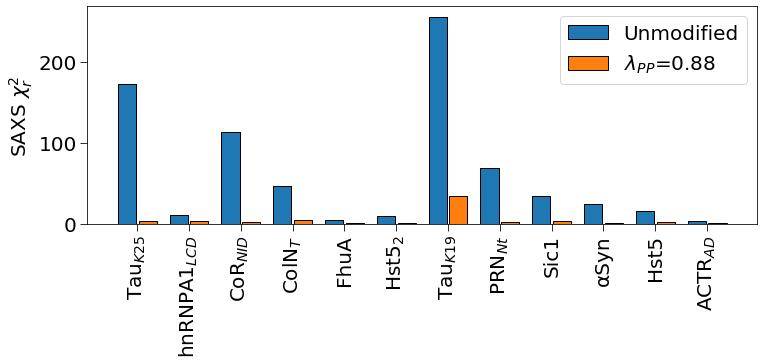

In [20]:
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP/martini3saxs_IDP_PP.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

xaxis_labels = []

chi2_lambda1_vs_protein = []
chi2_lambda2_vs_protein = []
for protein in IDPs:
    chi2_lambda1 = SAXS_chi2[protein].loc['1.00']
    chi2_lambda1_vs_protein.append(chi2_lambda1)
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein.append(chi2_lambda2)
    xaxis_labels.append(IDPs_plotnames[protein])

xaxismid = np.arange(1,len(IDPs)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

fig = plt.figure(figsize=(len(IDPs), 4))

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, loc='upper right')

fig.savefig(f'figures/SAXSchi2_IDPs_PP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_IDPs_PP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

$\chi^2_r$ original: 63.4 ± 21.9, chi2_PW: 4.84 +- 2.0277319112137975


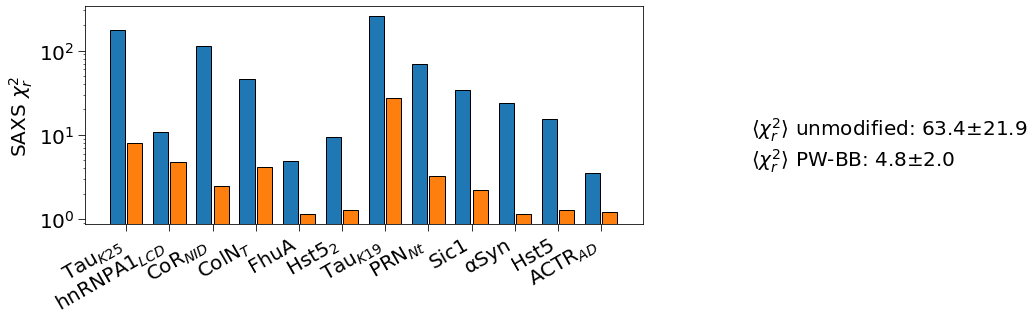

In [21]:
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP/martini3saxs_IDP_PP.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

xaxis_labels = []
chi2_lambda1_vs_protein = []
for protein in IDPs:
    chi2_lambda1 = SAXS_chi2[protein].loc['1.00']
    chi2_lambda1_vs_protein.append(chi2_lambda1)
    xaxis_labels.append(IDPs_plotnames[protein])

SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PW_BB/martini3saxs_IDP_PW_BB.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

chi2_lambda2_vs_protein = []
for protein in IDPs:
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PWBB]
    chi2_lambda2_vs_protein.append(chi2_lambda2)

xaxismid = np.arange(1,len(IDPs)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

print(f'$\chi^2_r$ original: {np.average(chi2_lambda1_vs_protein):.1f} ± {(np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein))):.1f}, chi2_PW: {np.average(chi2_lambda2_vs_protein):.2f} +- {np.std(chi2_lambda2_vs_protein)/np.sqrt(len(chi2_lambda2_vs_protein))}')

fig = plt.figure(figsize=(len(IDPs)-2, 4))

fig.text(1.05, 0.5, f'⟨$\chi^2_r$⟩ unmodified: {np.average(chi2_lambda1_vs_protein):.1f}±{np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein)):.1f}\n⟨$\chi^2_r$⟩ PW-BB: {np.average(chi2_lambda2_vs_protein):.1f}±{np.std(chi2_lambda2_vs_protein)/np.sqrt(len(chi2_lambda2_vs_protein)):.1f}', ha='left', va='top', fontsize=20)

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PW-BB}}$={lambda_PWBB}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper right')

fig.savefig(f'figures/SAXSchi2_IDPs_PWBB.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_IDPs_PWBB.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-protein and protein-water together

$\chi^2_r$ original: 63.4 ± 21.9, chi2_PW: 4.49 +- 2.2236019333669854, chi2_PP: +- 2.5807219754830926


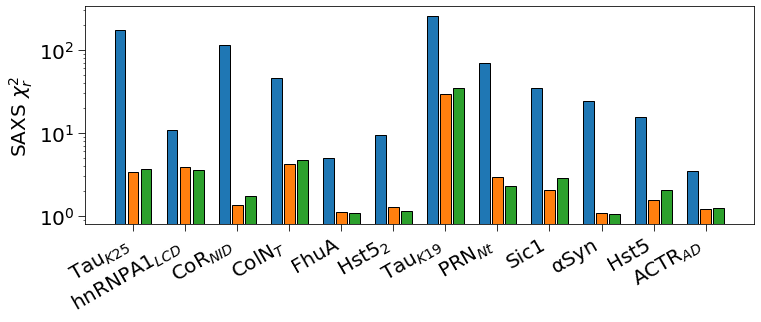

In [22]:
SAXS_chi2_PP_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP/martini3saxs_IDP_PP.pkl'
SAXS_chi2_PW_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PW/martini3saxs_idp.pkl'

SAXS_chi2_PP = load_pickle5(SAXS_chi2_PP_pkl)
SAXS_chi2_PW = load_pickle5(SAXS_chi2_PW_pkl)


xaxis_labels = []

chi2_lambda1_vs_protein = []
chi2_lambda2_vs_protein_PW = []
chi2_lambda2_vs_protein_PP = []

for protein in IDPs:
    chi2_lambda1 = SAXS_chi2_PP[protein].loc['1.00']
    chi2_lambda1_vs_protein.append(chi2_lambda1)
    chi2_lambda2_PP = SAXS_chi2_PP[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein_PP.append(chi2_lambda2_PP)
    
    chi2_lambda2_PW = SAXS_chi2_PW[protein].loc[lambda_PW]
    chi2_lambda2_vs_protein_PW.append(chi2_lambda2_PW)
    
    xaxis_labels.append(IDPs_plotnames[protein])
    
xaxismid = np.arange(1,len(IDPs)+1,1)
xaxis1 = xaxismid-0.25
xaxis2 = xaxismid
xaxis3 = xaxismid+0.25

print(f'$\chi^2_r$ original: {np.average(chi2_lambda1_vs_protein):.1f} ± {(np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein))):.1f}, chi2_PW: {np.average(chi2_lambda2_vs_protein_PW):.2f} +- {np.std(chi2_lambda2_vs_protein_PW)/np.sqrt(len(chi2_lambda2_vs_protein_PW))}, chi2_PP: +- {np.std(chi2_lambda2_vs_protein_PP/np.sqrt(len(chi2_lambda2_vs_protein_PP)))}')

fig = plt.figure(figsize=(len(IDPs), 4))

#fig.text(1.05, 0.5, f'⟨$\chi^2_r$⟩ unmodified: {np.average(chi2_lambda1_vs_protein):.1f}±{np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein)):.1f}\n⟨$\chi^2_r$⟩ PW: {np.average(chi2_lambda2_vs_protein_PW):.1f}±{np.std(chi2_lambda2_vs_protein_PW)/np.sqrt(len(chi2_lambda2_vs_protein_PW)):.1f}\n⟨$\chi^2_r$⟩ PP: {np.average(chi2_lambda2_vs_protein_PP):.1f}±{np.std(chi2_lambda2_vs_protein_PP)/np.sqrt(len(chi2_lambda2_vs_protein_PP)):.1f}', ha='left', va='top', fontsize=20)

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.2, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein_PW, width=0.2, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')
plt.bar(xaxis3, chi2_lambda2_vs_protein_PP, width=0.2, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper right')

fig.savefig(f'figures/SAXSchi2_IDPs_PWandPP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_IDPs_PWandPP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

# SAXS chi2 multidomain

In [25]:
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/martini3saxs_MP_PP.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

chi2_lambda1_vs_protein = []

xaxis_labels = []

for protein in multidomain_alt:
    chi2_lambda1 = SAXS_chi2[protein].loc['1.00']
    chi2_lambda1_vs_protein.append(chi2_lambda1)
    xaxis_labels.append(multidomain_alt_plotnames[protein])

## Protein-water

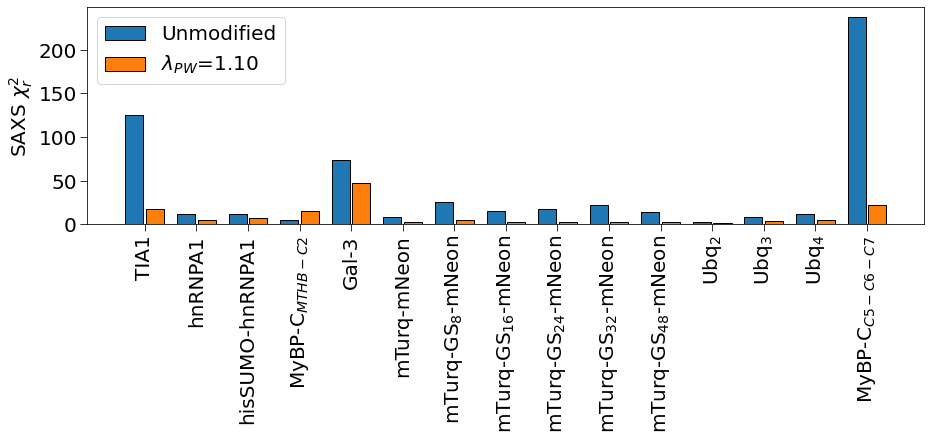

In [26]:
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW/martini3saxs_MP_PW.pkl'
SAXS_chi2_pkl_2 = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW/martini3saxs_md.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)
SAXS_chi2_2 = load_pickle5(SAXS_chi2_pkl_2)

for protein in SAXS_chi2_2:
    
    SAXS_chi2[protein] = SAXS_chi2_2[protein]
    
chi2_lambda2_vs_protein = []
for protein in multidomain_alt:
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PW]
    chi2_lambda2_vs_protein.append(chi2_lambda2)

xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

fig = plt.figure(figsize=(len(multidomain_alt), 4))

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, loc='upper left')

fig.savefig(f'figures/SAXSchi2_multidomain_PW.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PW.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-protein

In [27]:
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/martini3saxs_MP_PP.pkl'

In [28]:
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

chi2_lambda2_vs_protein = []
for protein in multidomain_alt:
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein.append(chi2_lambda2)

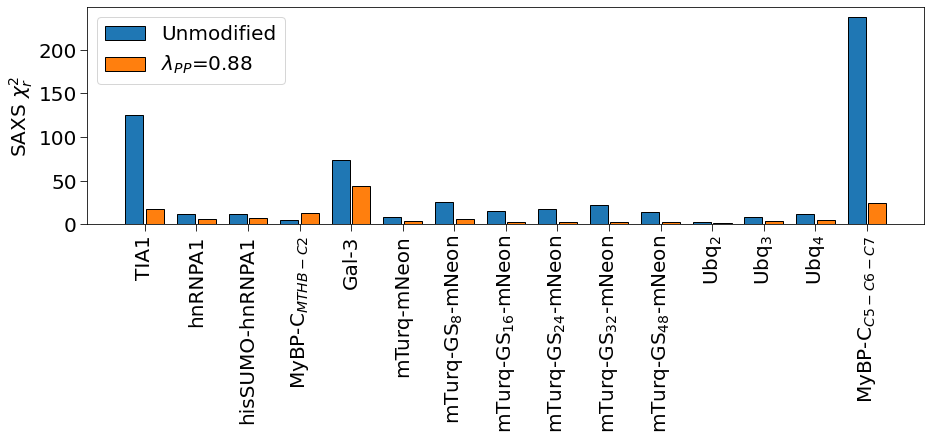

In [29]:
xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

fig = plt.figure(figsize=(len(multidomain_alt), 4))

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, loc='upper left')

fig.savefig(f'figures/SAXSchi2_multidomain_PP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water backbone

$\chi^2_r$ original: 39.2 ± 15.9, chi2_PW: 8.57 +- 3.234902676709312


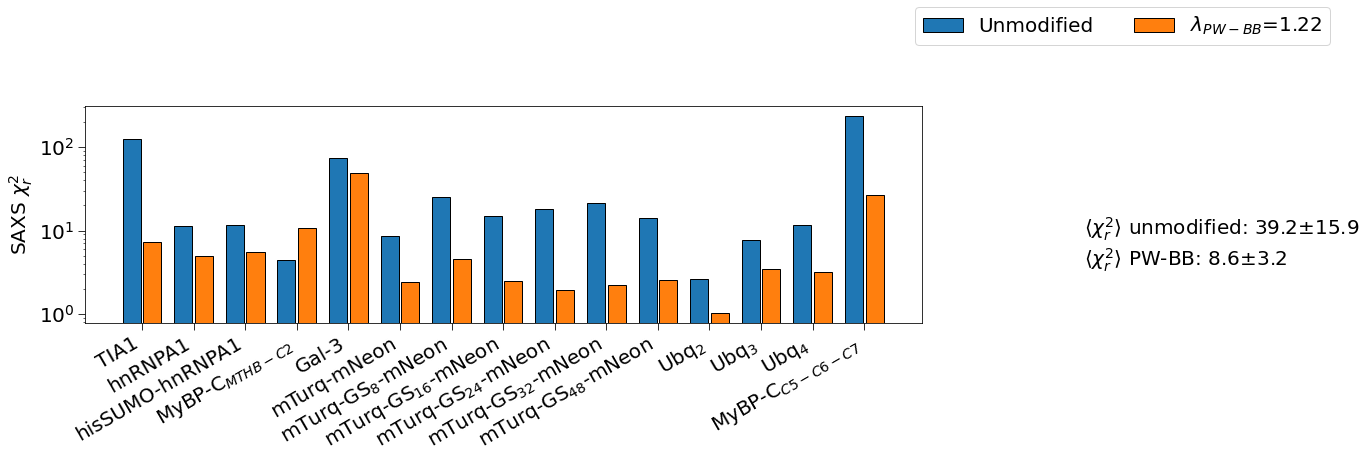

In [30]:
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW_BB/martini3saxs_MP_PW_BB.pkl'

SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

chi2_lambda2_vs_protein = []
for protein in multidomain_alt:
    chi2_lambda2 = SAXS_chi2[protein].loc[lambda_PWBB]
    chi2_lambda2_vs_protein.append(chi2_lambda2)

xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2

print(f'$\chi^2_r$ original: {np.average(chi2_lambda1_vs_protein):.1f} ± {(np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein))):.1f}, chi2_PW: {np.average(chi2_lambda2_vs_protein):.2f} +- {np.std(chi2_lambda2_vs_protein)/np.sqrt(len(chi2_lambda2_vs_protein))}')

fig = plt.figure(figsize=(len(multidomain_alt), 4))

fig.text(1.05, 0.5, f'⟨$\chi^2_r$⟩ unmodified: {np.average(chi2_lambda1_vs_protein):.1f}±{np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein)):.1f}\n⟨$\chi^2_r$⟩ PW-BB: {np.average(chi2_lambda2_vs_protein):.1f}±{np.std(chi2_lambda2_vs_protein)/np.sqrt(len(chi2_lambda2_vs_protein)):.1f}', ha='left', va='top', fontsize=20)

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.35, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein, width=0.35, edgecolor='black', label=f'$λ_{{PW-BB}}$={lambda_PWBB}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1.5,1.5), ncol=2) #bbox_to_anchor=(1.5,1.5))

fig.savefig(f'figures/SAXSchi2_multidomain_PWBB.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PWBB.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein-water and protein-protein together

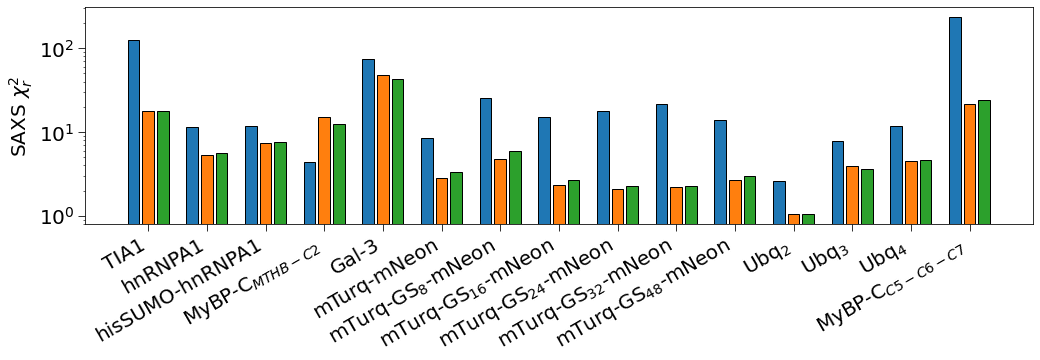

In [31]:
SAXS_chi2_pkl_PW = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW/martini3saxs_MP_PW.pkl'
SAXS_chi2_pkl_PW_2 = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW/martini3saxs_md.pkl'
SAXS_chi2_pkl_PP = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/martini3saxs_MP_PP.pkl'

SAXS_chi2_PW = load_pickle5(SAXS_chi2_pkl_PW)
SAXS_chi2_PW_2 = load_pickle5(SAXS_chi2_pkl_PW_2)
SAXS_chi2_PP = load_pickle5(SAXS_chi2_pkl_PP)

for protein in SAXS_chi2_PW_2:
    
    SAXS_chi2_PW[protein] = SAXS_chi2_PW_2[protein]
    
chi2_lambda2_vs_protein_PW = []
chi2_lambda2_vs_protein_PP = []

for protein in multidomain_alt:
    chi2_lambda2_PW = SAXS_chi2_PW[protein].loc[lambda_PW]
    chi2_lambda2_vs_protein_PW.append(chi2_lambda2_PW)
    
    chi2_lambda2_PP = SAXS_chi2_PP[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein_PP.append(chi2_lambda2_PP)


xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.25
xaxis2 = xaxismid
xaxis3 = xaxismid+0.25

fig = plt.figure(figsize=(len(multidomain)+2, 4))

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.2, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein_PW, width=0.2, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')
plt.bar(xaxis3, chi2_lambda2_vs_protein_PP, width=0.2, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

#plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.semilogy()
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper left') #bbox_to_anchor=(1.5,1.5))

fig.savefig(f'figures/SAXSchi2_multidomain_PWandPP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PWandPP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

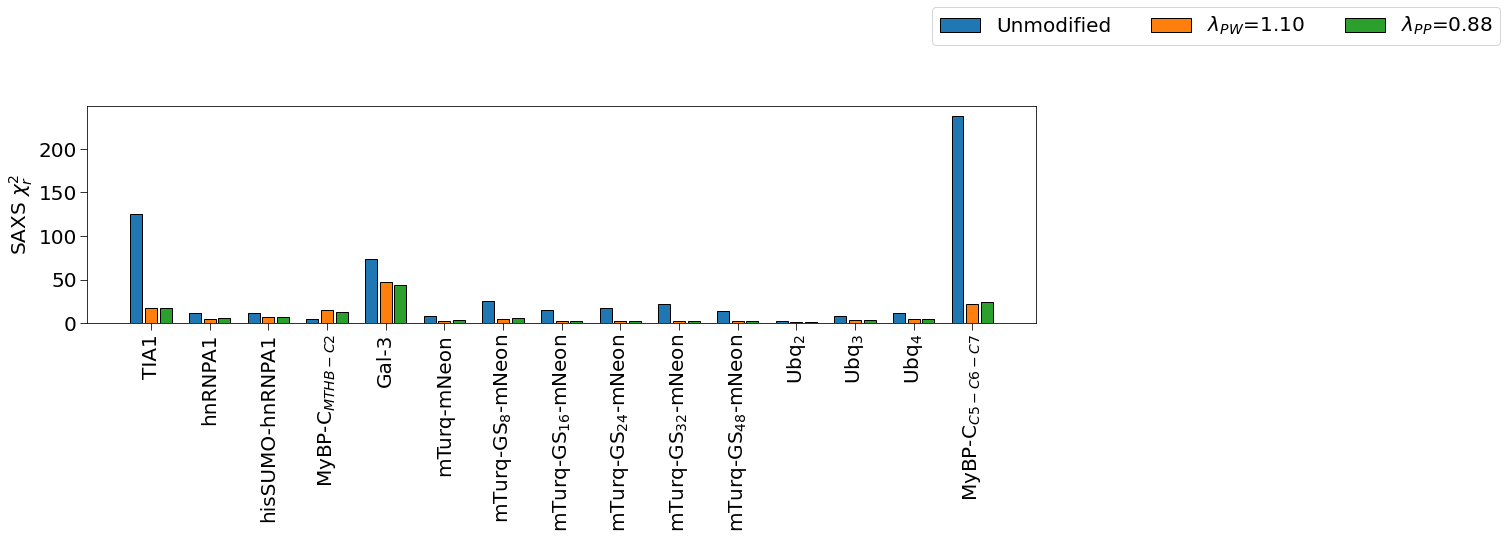

In [32]:
SAXS_chi2_pkl_PW = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW/martini3saxs_MP_PW.pkl'
SAXS_chi2_pkl_PW_2 = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW/martini3saxs_md.pkl'
SAXS_chi2_pkl_PP = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/martini3saxs_MP_PP.pkl'


SAXS_chi2_PW = load_pickle5(SAXS_chi2_pkl_PW)
SAXS_chi2_PW_2 = load_pickle5(SAXS_chi2_pkl_PW_2)
SAXS_chi2_PP = load_pickle5(SAXS_chi2_pkl_PP)

for protein in SAXS_chi2_PW_2:
    
    SAXS_chi2_PW[protein] = SAXS_chi2_PW_2[protein]
    
chi2_lambda2_vs_protein_PW = []
chi2_lambda2_vs_protein_PP = []

for protein in multidomain_alt:
    chi2_lambda2_PW = SAXS_chi2_PW[protein].loc[lambda_PW]
    chi2_lambda2_vs_protein_PW.append(chi2_lambda2_PW)
    
    chi2_lambda2_PP = SAXS_chi2_PP[protein].loc[lambda_PP]
    chi2_lambda2_vs_protein_PP.append(chi2_lambda2_PP)


xaxismid = np.arange(1,len(multidomain_alt)+1,1)
xaxis1 = xaxismid-0.25
xaxis2 = xaxismid
xaxis3 = xaxismid+0.25

fig = plt.figure(figsize=(len(multidomain)+2, 4))

#fig.text(1.05, 0.5, f'⟨$\chi^2_r$⟩ unmodified: {np.average(chi2_lambda1_vs_protein):.1f}±{np.std(chi2_lambda1_vs_protein)/np.sqrt(len(chi2_lambda1_vs_protein)):.1f}\n⟨$\chi^2_r$⟩ PW: {np.average(chi2_lambda2_vs_protein_PW):.1f}±{np.std(chi2_lambda2_vs_protein_PW)/np.sqrt(len(chi2_lambda2_vs_protein_PW)):.1f}\n⟨$\chi^2_r$⟩ PP: {np.average(chi2_lambda2_vs_protein_PP):.1f}±{np.std(chi2_lambda2_vs_protein_PP)/np.sqrt(len(chi2_lambda2_vs_protein_PP)):.1f}', ha='left', va='top', fontsize=20)

plt.bar(xaxis1, chi2_lambda1_vs_protein, width=0.2, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_lambda2_vs_protein_PW, width=0.2, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')
plt.bar(xaxis3, chi2_lambda2_vs_protein_PP, width=0.2, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation='vertical', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1.5,1.5), ncol=3) #bbox_to_anchor=(1.5,1.5))

fig.savefig(f'figures/SAXSchi2_multidomain_PWandPP_legend.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/SAXSchi2_multidomain_PWandPP_legend.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

# A1 variants

In [33]:
proteins = ['WT', 'm10R', 'm10Rp10K', 'm12Fp12Y', 'm6Rp6K', 'p7Fm7Y', 'p7Kp12D']
protein_plotnames = {'WT':'WT', 
                     'm10R':'-10R', 
                     'm10Rp10K':'-10R+10K', 
                     'm12Fp12Y':'-12F+12Y', 
                     'm6Rp6K':'-6R+6K', 
                     'p7Fm7Y':'+7F-7Y', 
                     'p7Kp12D':'+7K+12D'}
force_fields = ['martini_v300_original', 'martini_v300_mod_PP_0.88']
force_fields_plotnames = {'martini_v300_original':'Unmodified', 'martini_v300_mod_PP_0.88':'$\lambda_{PP}$=0.88'}
Rg_exp = {'WT': [2.76, 0.05], 'm10R':[2.67, 0.05], 'm10Rp10K':[2.85, 0.05], 'm12Fp12Y':[2.60, 0.05], 'm6Rp6K':[2.79, 0.05], 'p7Fm7Y':[2.72, 0.05], 'p7Kp12D':[2.92, 0.05]}
errmethod = 'hline' #for blocking

In [34]:
Rg_exp_vs_protein = []
Rg_exp_err_vs_protein = []

for protein in proteins:
    Rg_exp_vs_protein.append(Rg_exp[protein][0])
    Rg_exp_err_vs_protein.append(Rg_exp[protein][1])
Rg_exp_vs_protein = np.array(Rg_exp_vs_protein)
Rg_exp_err_vs_protein = np.array(Rg_exp_err_vs_protein) 
    
Rg_sim_vs_protein_vs_ff = {}

for ff in force_fields:
    
    Rg_sim_vs_protein = []
    Rg_sim_err_vs_protein = []
    
    for protein in proteins:
       
        time, Rg = np.genfromtxt(f'A1_variants/Production_run/calc_Rg/Rg_gyrate_{protein}_{ff}.xvg', skip_header=27, usecols=(0,1), unpack=True)

        #Block error analysis
        blocks_stat = block.blocking(Rg)
        if errmethod != 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
        elif errmethod == 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)

        Rg_avg = np.average(Rg)

        Rg_sim_vs_protein.append(Rg_avg)
        Rg_sim_err_vs_protein.append(err)

    Rg_sim_vs_protein_vs_ff[ff] = [np.array(Rg_sim_vs_protein), np.array(Rg_sim_err_vs_protein)]
        
        

/storage1/thomasen/software/BLOCKING/MonoCV/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


In [35]:
pearson_vs_ff = {}
spearman_vs_ff = {}

for ff in force_fields:
    
    pearson, pval_pearson = stats.pearsonr(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0])
    spearman, pval_spearman = stats.spearmanr(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0])

    pearson_vs_ff[ff] = [pearson, pval_pearson]
    spearman_vs_ff[ff] = [spearman, pval_spearman]

[3 1 5 0 4 2 6]


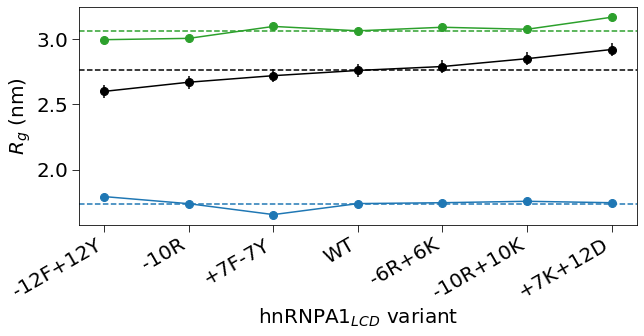

In [36]:
colors_pltdefault = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors_pltdefault = [colors_pltdefault[0], colors_pltdefault[2]]

fig= plt.figure(figsize=(10,4))

plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.xlabel('hnRNPA1$_{LCD}$ variant', fontsize=20)
plt.ylabel('$\it{R}$$_{g}$ (nm)', fontsize=20)

idxs = np.argsort(Rg_exp_vs_protein)
print(idxs)

Rg_exp_vs_protein_sort = Rg_exp_vs_protein[idxs]
Rg_exp_err_vs_protein_sort = Rg_exp_err_vs_protein[idxs]
plt.errorbar(range(len(Rg_exp_vs_protein_sort)), Rg_exp_vs_protein_sort, yerr=Rg_exp_err_vs_protein_sort, fmt='-o', markersize=8, c='black', label='Experimental')
plt.axhline(Rg_exp['WT'][0], linestyle='--', c='black')

for i,ff in enumerate(force_fields):
    Rg_sim_vs_protein = Rg_sim_vs_protein_vs_ff[ff][0][idxs]
    Rg_sim_err_vs_protein = Rg_sim_vs_protein_vs_ff[ff][1][idxs]
    plt.errorbar(range(len(Rg_sim_vs_protein)), Rg_sim_vs_protein, yerr=Rg_sim_err_vs_protein, fmt='-o', markersize=8, c=colors_pltdefault[i])
    plt.axhline(Rg_sim_vs_protein_vs_ff[ff][0][0], linestyle='--', c=colors_pltdefault[i])

protein_labels_sorted=[]
for i in idxs:
    protein_labels_sorted.append(protein_plotnames[proteins[i]])
    
plt.xticks(ticks=range(len(proteins)), labels=protein_labels_sorted, rotation=30, fontsize=20, ha='right')
#plt.legend(fontsize=20, bbox_to_anchor=(1.10, 1.0))

fig.savefig("figures/A1_variants_Rg_vs_protein.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rg_vs_protein.png", bbox_inches='tight', pad_inches=1, dpi=400)


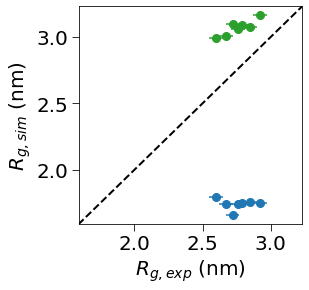

In [37]:
axischeck = Rg_exp_vs_protein
for ff in force_fields:
    axischeck = np.concatenate((axischeck,Rg_sim_vs_protein_vs_ff[ff][0]))

axismax = np.amax(axischeck)
axismin = np.amin(axischeck)
axismax += 0.02*axismax 
axismin -= 0.02*axismax 

fig = plt.figure(figsize=(4,4))

for i,ff in enumerate(force_fields):

    plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=8, c=colors_pltdefault[i])
    
#plot diagonal
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')

plt.xlim(axismin, axismax)
plt.ylim(axismin, axismax)

#plt.xlim(2.5, 3.0)
#plt.ylim(axismin, axismax)

plt.xticks([2, 2.5, 3])
plt.yticks([2, 2.5, 3])

plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp.png", bbox_inches='tight', pad_inches=1, dpi=400)


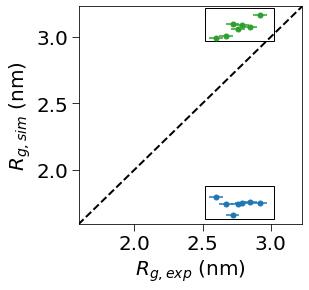

In [38]:
axischeck = Rg_exp_vs_protein
for ff in force_fields:
    axischeck = np.concatenate((axischeck,Rg_sim_vs_protein_vs_ff[ff][0]))

axismax = np.amax(axischeck)
axismin = np.amin(axischeck)
axismax += 0.02*axismax 
axismin -= 0.02*axismax 

fig = plt.figure(figsize=(4,4))

for i,ff in enumerate(force_fields):

    plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=5, c=colors_pltdefault[i])
    
plt.gca().add_patch(plt.Rectangle((2.52, 1.63), 0.5, 0.25, edgecolor='black', facecolor='none', lw=1))
plt.gca().add_patch(plt.Rectangle((2.52, 2.97), 0.5, 0.25, edgecolor='black', facecolor='none', lw=1))

#plot diagonal
x=[0,100]
y=[0,100]
plt.plot(x,y,'--',linewidth=2,color='black')

plt.xlim(axismin, axismax)
plt.ylim(axismin, axismax)

#plt.xlim(2.5, 3.0)
#plt.ylim(axismin, axismax)

plt.xticks([2, 2.5, 3])
plt.yticks([2, 2.5, 3])

plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_withboxes.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_withboxes.png", bbox_inches='tight', pad_inches=1, dpi=400)


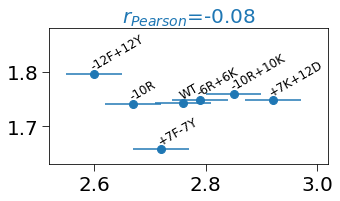

In [39]:
fig = plt.figure(figsize=(5,2.5))

ff = 'martini_v300_original'
plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=8, c=colors_pltdefault[0])

#plot diagonal
x=[0,5]
y=[0,5]
plt.plot(x,y,'--',linewidth=2,color='black')

for i,protein in enumerate(proteins):
    plt.text(Rg_exp_vs_protein[i]-0.01, Rg_sim_vs_protein_vs_ff[ff][0][i]+0.008, protein_plotnames[protein], fontsize=12, rotation=30)

plt.title(f'$r_{{Pearson}}$={pearson_vs_ff[ff][0]:.2f}', fontsize=20, c=colors_pltdefault[0])

plt.xlim(2.52, 3.02) #0.5 diff
plt.ylim(1.63, 1.88) #0.25 diff

#plt.xticks([2.6, 2.8, 3.0, 3.2])
#plt.yticks([2.6, 2.8, 3.0, 3.2])

#plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
#plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_unmodifiedonly.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_unmodifiedonly.png", bbox_inches='tight', pad_inches=1, dpi=400)


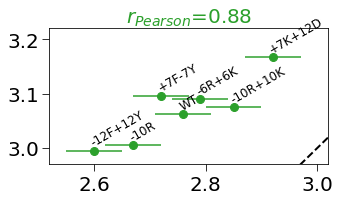

In [40]:
fig = plt.figure(figsize=(5,2.5))

ff = 'martini_v300_mod_PP_0.88'
plt.errorbar(Rg_exp_vs_protein, Rg_sim_vs_protein_vs_ff[ff][0], xerr=Rg_exp_err_vs_protein, yerr=Rg_sim_vs_protein_vs_ff[ff][1], fmt='o', ms=8, c=colors_pltdefault[1])

#plot diagonal
x=[0,5]
y=[0,5]
plt.plot(x,y,'--',linewidth=2,color='black')

for i,protein in enumerate(proteins):
    plt.text(Rg_exp_vs_protein[i]-0.01, Rg_sim_vs_protein_vs_ff[ff][0][i]+0.008, protein_plotnames[protein], fontsize=12, rotation=30)

plt.title(f'$r_{{Pearson}}$={pearson_vs_ff[ff][0]:.2f}', fontsize=20, c=colors_pltdefault[1])

plt.xlim(2.52, 3.02) #0.5 diff
plt.ylim(2.97, 3.22) #0.25 diff

#plt.xticks([2.6, 2.8, 3.0, 3.2])
#plt.yticks([2.6, 2.8, 3.0, 3.2])

#plt.xlabel('$\it{R}$$_{g, exp}$ (nm)', fontsize=20)
#plt.ylabel('$\it{R}$$_{g, sim}$ (nm)', fontsize=20)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_PPonly.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_variants_Rgsim_vs_Rgexp_PPonly.png", bbox_inches='tight', pad_inches=1, dpi=400)


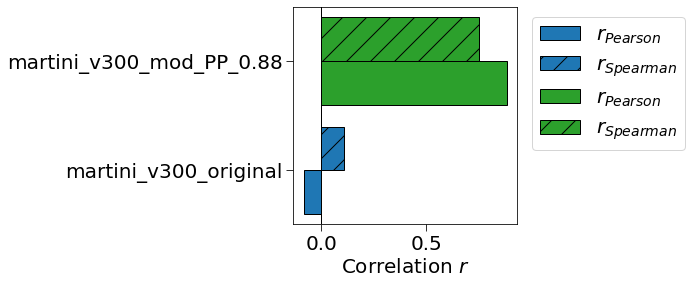

In [41]:
fig = plt.figure(figsize=(4,4))

plt.yticks(range(len(force_fields)), labels=force_fields)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.xlabel('Correlation $r$', fontsize=20)

for i,ff in enumerate(force_fields):
    plt.barh(i-0.2, pearson_vs_ff[ff][0], height=0.4, color=colors_pltdefault[i], lw=1, edgecolor='black', label='$r_{Pearson}$')
    plt.barh(i+0.2, spearman_vs_ff[ff][0], height=0.4, color=colors_pltdefault[i], lw=1, edgecolor='black', hatch='/', label='$r_{Spearman}$')
    plt.axvline(0, ls='-', lw=1, c='black')

plt.legend(fontsize=20, bbox_to_anchor=(1.8,1.0))

#fig.savefig("figures/A1_variants_correlation_vs_ff.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
#fig.savefig("figures/A1_varaints_correlation_vs_ff.png", bbox_inches='tight', pad_inches=1, dpi=400)

{'martini_v300_original': [-0.08423186143237031, 0.8575102908331839], 'martini_v300_mod_PP_0.88': [0.8819300335743561, 0.008625108567692137]}
{'martini_v300_original': [0.10714285714285716, 0.8191508555699912], 'martini_v300_mod_PP_0.88': [0.7500000000000002, 0.05218140045705776]}


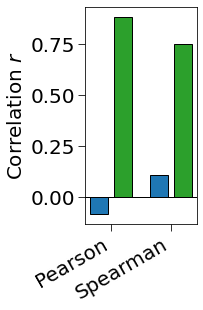

In [42]:
fig = plt.figure(figsize=(2,4))

#plt.yticks(range(len(force_fields)), labels=force_fields)
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.ylabel('Correlation $r$', fontsize=20)

plt.bar(1-0.2, pearson_vs_ff[force_fields[0]][0], width=0.3, color=colors_pltdefault[0], lw=1, edgecolor='black')
plt.bar(1+0.2, pearson_vs_ff[force_fields[1]][0], width=0.3, color=colors_pltdefault[1], lw=1, edgecolor='black')


plt.bar(2-0.2, spearman_vs_ff[force_fields[0]][0], width=0.3, color=colors_pltdefault[0], lw=1, edgecolor='black')
plt.bar(2+0.2, spearman_vs_ff[force_fields[1]][0], width=0.3, color=colors_pltdefault[1], lw=1, edgecolor='black')

plt.xticks(ticks=[1,2], labels=['Pearson', 'Spearman'], rotation=30, fontsize=20, ha='right')

#plt.legend(fontsize=20, bbox_to_anchor=(1.8,1.0))
plt.axhline(0, ls='-', lw=1, c='black')

fig.savefig("figures/A1_variants_correlation_vs_ff.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/A1_varaints_correlation_vs_ff.png", bbox_inches='tight', pad_inches=1, dpi=400)

print(pearson_vs_ff)
print(spearman_vs_ff)

# PRE plot

In [43]:
PRE_proteins = ['aSyn', 'FUS', 'A2']

PRE_proteins_plotnames = {'FUS':'FUS$_{LCD}$', 
                  'A2':'hnRNPA2$_{LCD}$', 
                  'aSyn':'αSyn', 
}


## tau_c 4ns

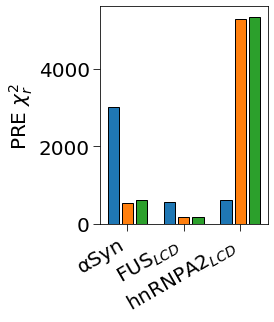

In [44]:
chi2_vs_protein_original = []
chi2_vs_protein_PW = []
chi2_vs_protein_PP = []

xaxis_labels = []

for protein in PRE_proteins:
    pkl_file_PP = f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/PREs/IDPs/PP/All_frames/Tauc_4ns/{protein}_PREs.pkl'
    pkl_file_PW = f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/PREs/IDPs/PW/Tauc_4ns/{protein}_PREs.pkl'
    
    PRE_results_PP = load_pickle5(pkl_file_PP)
    PRE_results_PW = load_pickle5(pkl_file_PW)
        
    chi2_original = PRE_results_PP[1.00]['chi2']
    chi2_PP = PRE_results_PP[float(lambda_PP)]['chi2']
    chi2_PW = PRE_results_PW[float(lambda_PW)]['chi2']
    
    chi2_vs_protein_original.append(chi2_original)
    chi2_vs_protein_PW.append(chi2_PW)
    chi2_vs_protein_PP.append(chi2_PP)
    
    xaxis_labels.append(PRE_proteins_plotnames[protein])
    
xaxismid = np.arange(1,len(PRE_proteins)+1,1)
xaxis1 = xaxismid-0.25
xaxis2 = xaxismid
xaxis3 = xaxismid+0.25

fig = plt.figure(figsize=(len(PRE_proteins), 4))

plt.bar(xaxis1, chi2_vs_protein_original, width=0.2, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_vs_protein_PW, width=0.2, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PW}')
plt.bar(xaxis3, chi2_vs_protein_PP, width=0.2, edgecolor='black', label=f'$λ_{{PP}}$={lambda_PP}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#plt.semilogy()
plt.ylabel('PRE $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper left')

fig.savefig(f'figures/PREchi2_tauc4ns.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/PREchi2_tauc4ns.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein backbone-water

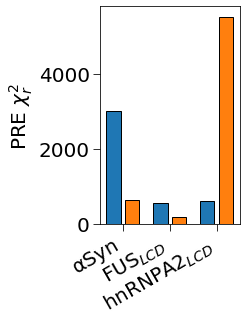

In [45]:
chi2_vs_protein_original = []
chi2_vs_protein_PWBB = []

xaxis_labels = []

for protein in PRE_proteins:
    pkl_file_PWBB = f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/PREs/IDPs/PW_BB/All_frames/Tauc_4ns/{protein}_PREs.pkl'
    pkl_file_PP = f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/PREs/IDPs/PP/All_frames/Tauc_4ns/{protein}_PREs.pkl'
    
    PRE_results_PWBB = load_pickle5(pkl_file_PWBB)
    PRE_results_PP = load_pickle5(pkl_file_PP)
    
    chi2_original = PRE_results_PP[1.00]['chi2']
    chi2_PWBB = PRE_results_PWBB[float(lambda_PWBB)]['chi2']
        
    chi2_vs_protein_original.append(chi2_original)
    chi2_vs_protein_PWBB.append(chi2_PWBB)
    
    xaxis_labels.append(PRE_proteins_plotnames[protein])
    
xaxismid = np.arange(1,len(PRE_proteins)+1,1)
xaxis1 = xaxismid-0.2
xaxis2 = xaxismid+0.2


fig = plt.figure(figsize=(len(PRE_proteins)-0.5, 4))

plt.bar(xaxis1, chi2_vs_protein_original, width=0.3, edgecolor='black', label='Unmodified')
plt.bar(xaxis2, chi2_vs_protein_PWBB, width=0.3, edgecolor='black', label=f'$λ_{{PW}}$={lambda_PWBB}')

plt.xticks(xaxismid, labels=xaxis_labels, rotation=30, fontsize=20, ha='right')
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

#plt.semilogy()
plt.ylabel('PRE $\chi^2_r$', fontsize=20)
#plt.legend(fontsize=20, loc='upper left')

fig.savefig(f'figures/PREchi2_PWBB_tauc4ns.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/PREchi2_PWBB_tauc4ns.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

# Select frame based on average Rg

## IDPs

In [46]:
protein='K25'

Rg_original = np.genfromtxt(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/lambda_1.00/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_original = np.average(Rg_original)
MSE_Rg_original = np.square(Rg_original-average_Rg_original)
frame_index_original = np.argmin(MSE_Rg_original)

Rg_PW = np.genfromtxt(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/lambda_{lambda_PW}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_PW = np.average(Rg_PW)
MSE_Rg_PW = np.square(Rg_PW-average_Rg_PW)
frame_index_PW = np.argmin(MSE_Rg_PW)

Rg_PP = np.genfromtxt(f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP/{protein}/lambda_{lambda_PP}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_PP = np.average(Rg_PP)
MSE_Rg_PP = np.square(Rg_PP-average_Rg_PP)
frame_index_PP = np.argmin(MSE_Rg_PP)

traj_original = md.load(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/lambda_1.00/prodrun_nopbc.xtc', top=f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/PRO_CG.gro')
traj_PW = md.load(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/lambda_{lambda_PW}/prodrun_nopbc.xtc', top=f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/IDP/Production_run/{protein}/PRO_CG.gro')
traj_PP = md.load(f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP/{protein}/lambda_{lambda_PP}/prodrun_nopbc.xtc', top=f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP/{protein}/PRO_CG.gro')

frame_original = traj_original[frame_index_original]
frame_PW = traj_PW[frame_index_PW]
frame_PP = traj_PP[frame_index_PP]

frame_original.save_pdb(f'rep_frames/{protein}_frame_avgRg_original.pdb')
frame_PW.save_pdb(f'rep_frames/{protein}_frame_avgRg_PW.pdb')
frame_PP.save_pdb(f'rep_frames/{protein}_frame_avgRg_PP.pdb')

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (ALA, MET)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (GLU, ALA)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (PRO, GLU)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consec

## Multidomain

In [47]:
protein='TIA1'

Rg_original = np.genfromtxt(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/lambda_1.00/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_original = np.average(Rg_original)
MSE_Rg_original = np.square(Rg_original-average_Rg_original)
frame_index_original = np.argmin(MSE_Rg_original)

Rg_PW = np.genfromtxt(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/lambda_{lambda_PW}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_PW = np.average(Rg_PW)
MSE_Rg_PW = np.square(Rg_PW-average_Rg_PW)
frame_index_PW = np.argmin(MSE_Rg_PW)

Rg_PP = np.genfromtxt(f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/{protein}/lambda_{lambda_PP}/Rg_gyrate.xvg', usecols=(1), skip_header=27, unpack=True)
average_Rg_PP = np.average(Rg_PP)
MSE_Rg_PP = np.square(Rg_PP-average_Rg_PP)
frame_index_PP = np.argmin(MSE_Rg_PP)

traj_original = md.load(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/lambda_1.00/prodrun_nopbc.xtc', top=f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/PRO_CG.gro')
traj_PW = md.load(f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/lambda_{lambda_PW}/prodrun_nopbc.xtc', top=f'/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/multidomain/Production_run/{protein}/PRO_CG.gro')
traj_PP = md.load(f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/{protein}/lambda_{lambda_PP}/prodrun_nopbc.xtc', top=f'/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/{protein}/PRO_CG.gro')

frame_original = traj_original[frame_index_original]
frame_PW = traj_PW[frame_index_PW]
frame_PP = traj_PP[frame_index_PP]

frame_original.save_pdb(f'rep_frames/{protein}_frame_avgRg_original.pdb')
frame_PW.save_pdb(f'rep_frames/{protein}_frame_avgRg_PW.pdb')
frame_PP.save_pdb(f'rep_frames/{protein}_frame_avgRg_PP.pdb')

/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (MET, GLU)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (PRO, MET)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (LEU, THR)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/lindorffgrp-isilon/thomasen/software/miniconda3/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consec

# SAXS chi2 scan

## Protein-protein 

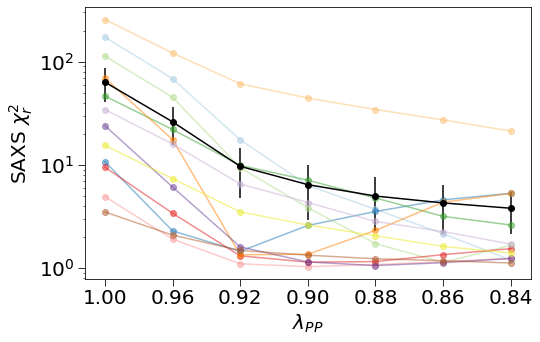

In [48]:
#IDPs
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PP/martini3saxs_IDP_PP.pkl'
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.errorbar(SAXS_chi2.index, SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(IDPs):
    plt.plot(SAXS_chi2[protein], '-o', alpha=0.5, c=colors_IDPs[i])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PP}$', fontsize=20)

fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)


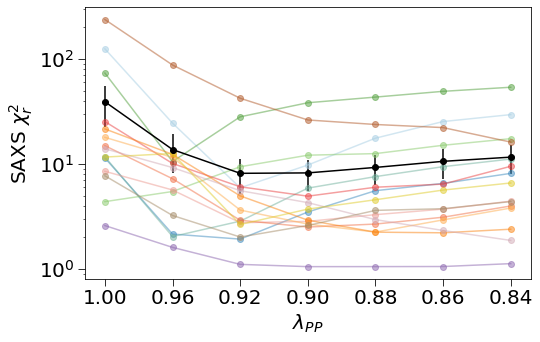

In [49]:
#Multidomain
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PP/martini3saxs_MP_PP.pkl'
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.errorbar(SAXS_chi2.index, SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(multidomain_alt):
    plt.plot(SAXS_chi2[protein], '-o', alpha=0.5, c=colors_multidomain[i])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PP}$', fontsize=20)

fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PP.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PP.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

## Protein backbone-water

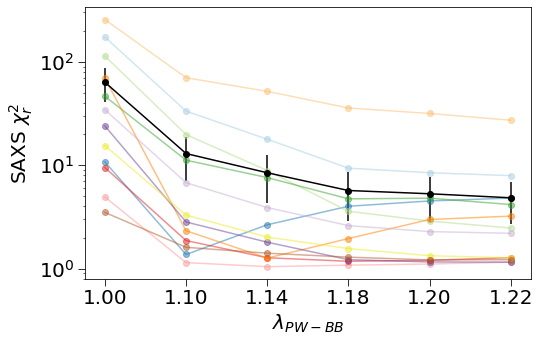

In [50]:
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/IDPs/PW_BB/martini3saxs_IDP_PW_BB.pkl'
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.errorbar(SAXS_chi2.index, SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(IDPs):
    plt.plot(SAXS_chi2[protein], '-o', alpha=0.5, c=colors_IDPs[i])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PW-BB}$', fontsize=20)

fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PWBB.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_IDPs_PWBB.pdf', bbox_inches='tight', pad_inches=1, dpi=400)

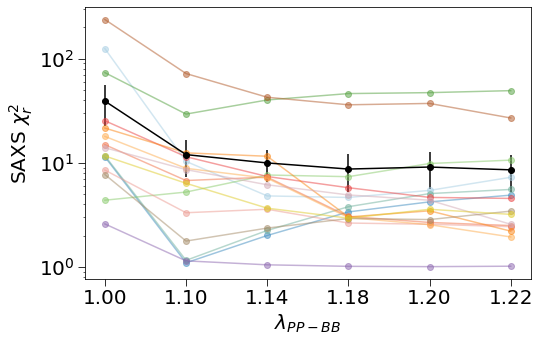

In [51]:
SAXS_chi2_pkl = '/storage1/skaalum/Prodruns_from_computerome/Complete_analysis/MPs/PW_BB/martini3saxs_MP_PW_BB.pkl'
SAXS_chi2 = load_pickle5(SAXS_chi2_pkl)

fig = plt.figure(figsize=(8,5))

plt.semilogy()
plt.tick_params(color='black', direction='out', length=7, labelsize=20)

plt.errorbar(SAXS_chi2.index, SAXS_chi2.mean(axis=1), yerr=SAXS_chi2.sem(axis=1), fmt='-o', c='black')

for i,protein in enumerate(multidomain_alt):
    plt.plot(SAXS_chi2[protein], '-o', alpha=0.5, c=colors_multidomain[i])
    
plt.ylabel('SAXS $\chi^2_r$', fontsize=20)
plt.xlabel('$λ_{PP-BB}$', fontsize=20)
 
fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PWBB.png', bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig(f'figures/lambda_scan_SAXSchi2_multidomain_PWBB.pdf', bbox_inches='tight', pad_inches=1, dpi=400)